# Importing the dataset

In [28]:
dataset = read.csv("Position_Salaries.csv")
dataset = dataset[, 2:3]
dataset

Level,Salary
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000
7,200000
8,300000
9,500000
10,1000000


# Taking care of missing data

In [29]:
#dataset$Age = ifelse(is.na(dataset$Age), ave(dataset$Age, FUN = function(x) mean(x, na.rm = TRUE)), dataset$Age)

# Encoding categorical data

In [30]:
# dataset$State = factor(dataset$State, levels = c('New York', 'California', 'Florida'), labels = c(1,2,3))

# Splitting the dataset into the Training set and Test set

In [31]:
# options(repos='http://cran.rstudio.com/')
# install.packages('caTools')
# library(caTools)
# set.seed(42)
# split = sample.split(dataset$Profit, SplitRatio = 2/3)
# training_set = subset(dataset, split == TRUE)
# test_set = subset(dataset, split == FALSE)
# dim(training_set)

# Feature Scaling

In [32]:
# training_set = scale(training_set)
# test_set = scale(test_set)

# Fitting simple linear regression to the dataset

In [33]:
lin_reg = lm(formula = Salary ~ ., data = dataset)
# summary(regressor)

# Fitting polynomial regression to the dataset

In [38]:
dataset$Level2 = dataset$Level^2
dataset$Level3 = dataset$Level^3
dataset$Level4 = dataset$Level^4
poly_reg = lm(formula = Salary ~ ., data = dataset)
# summary(regressor)

# Visualising the linear regression results

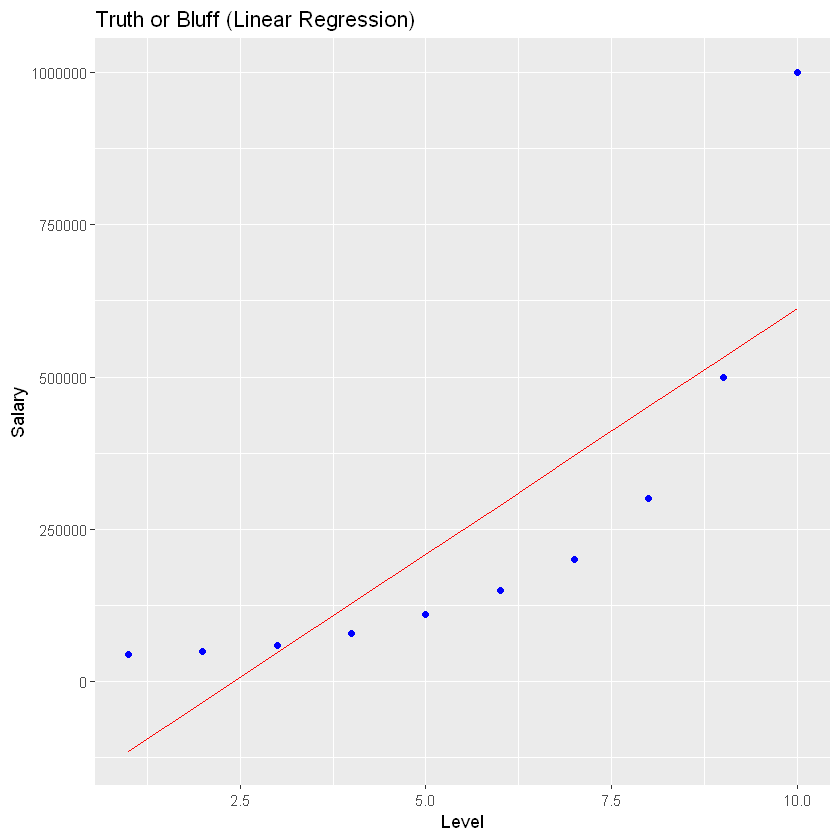

In [40]:
# options(repos='http://cran.rstudio.com/')
# install.packages('ggplot2')
library(ggplot2)
ggplot() +
    geom_point(aes(x = dataset$Level, y = dataset$Salary),
                colour = 'blue') +
    geom_line(aes(x = dataset$Level, y = predict(lin_reg, newdata = dataset)),
                colour = 'red') +
    ggtitle('Truth or Bluff (Linear Regression)') +
    xlab('Level') +
    ylab('Salary')

# Visualising the polynomial regression results

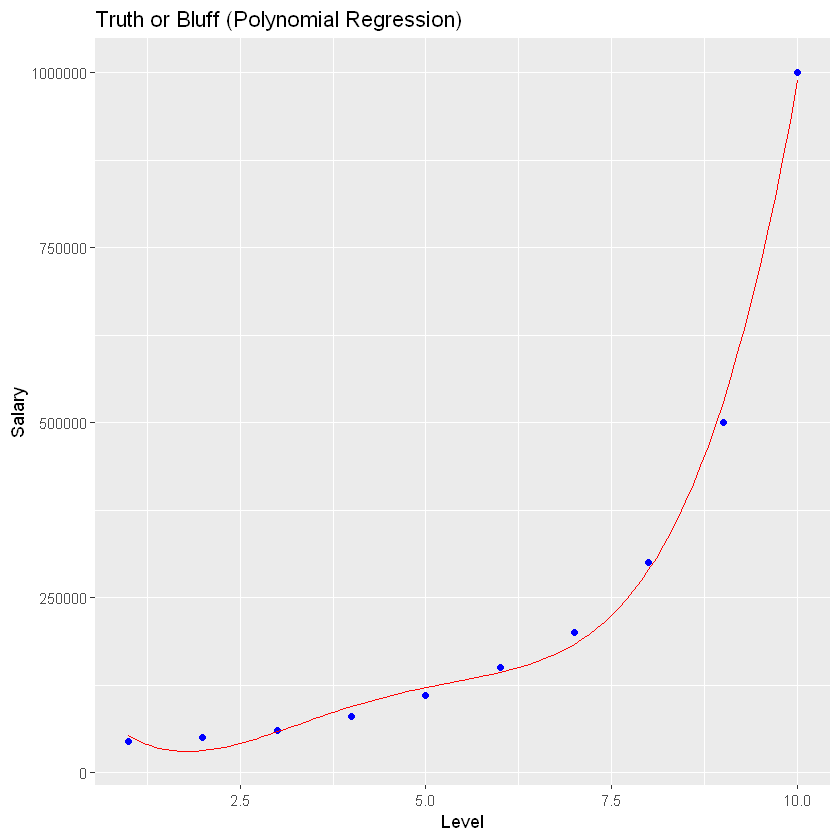

In [52]:
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.1)
ggplot() +
    geom_point(aes(x = dataset$Level, y = dataset$Salary),
                colour = 'blue') +
    geom_line(aes(x = x_grid, y = predict(poly_reg, newdata = data.frame(Level = x_grid, 
                                                                        Level2 = x_grid^2,
                                                                        Level3 = x_grid^3,
                                                                        Level4 = x_grid^4))),
                colour = 'red') +
    ggtitle('Truth or Bluff (Polynomial Regression)') +
    xlab('Level') +
    ylab('Salary')

# Predicting a new result with linear regression

In [42]:
y_pred = predict(lin_reg, data.frame(Level = 6.5))
y_pred

1 
330378.8

# Predicting a new result with polynomial regression

In [44]:
y_pred = predict(poly_reg, data.frame(Level = 6.5,
                                     Level2 = 6.5^2,
                                     Level3 = 6.5^3,
                                     Level4 = 6.5^4))
y_pred

1 
158862.5